In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras.datasets import imdb
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.layers import Embedding, Flatten, Dense
import keras.utils
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
(train_data, train_labels), (test_data, test_labels) =  imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
input_shape = (28, 28, 1)

In [ ]:
def one_hot_encoder(samples, no_features):
  output_tensor = np.zeros((len(samples), no_features))
  for idx, sample in enumerate(samples):
    output_tensor[idx, sample] = 1
  return output_tensor

In [ ]:
x_train = one_hot_encoder(train_data, 10000)
x_test = one_hot_encoder(test_data, 10000)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
model = keras.models.Sequential([

    Dense(16, activation= 'relu',input_shape = (10000,)),
    Dense(16, activation= 'relu'),
    Dense(1, activation= 'sigmoid')
    ])

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val_set = x_train[:10000]
x_train_set = x_train[10000:]

In [ ]:
y_val_set = y_train[:10000]
y_train_set = y_train[10000:]

In [ ]:
history = model.fit(x_train_set,
          y_train_set,
          epochs=20,
          batch_size=512,
          validation_data=(x_val_set, y_val_set))

Epoch 1/20
30/30 [==============================] - 4s 80ms/step - loss: 0.5414 - accuracy: 0.7779 - val_loss: 0.4178 - val_accuracy: 0.8637
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3478 - accuracy: 0.8870 - val_loss: 0.3300 - val_accuracy: 0.8811
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2635 - accuracy: 0.9124 - val_loss: 0.2968 - val_accuracy: 0.8851
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2141 - accuracy: 0.9307 - val_loss: 0.2823 - val_accuracy: 0.8868
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1800 - accuracy: 0.9385 - val_loss: 0.2761 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1549 - accuracy: 0.9500 - val_loss: 0.2789 - val_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1368 - accuracy: 0.9566 - val_loss: 0.2844 - val_accuracy: 0.8863
Epoch 8/20
30

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(1, len(train_acc) + 1)

Text(0, 0.5, 'Loss')

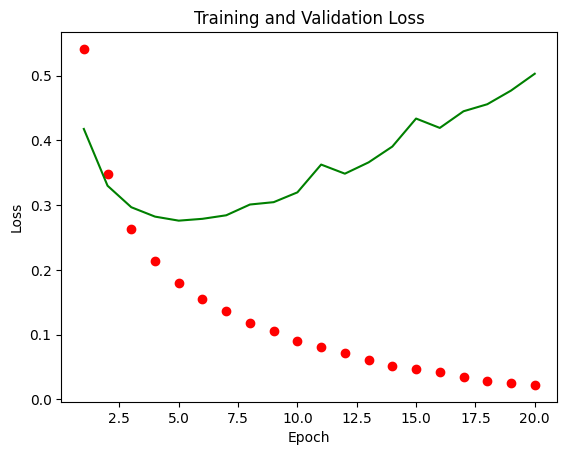

In [ ]:
plt.plot(epochs, train_loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

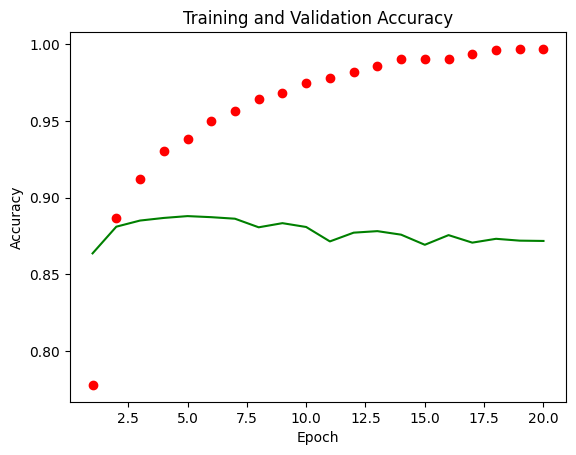

In [ ]:
plt.clf()
plt.plot(epochs, train_acc, 'ro', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [ ]:
stroka ='Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble ca...'

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.03849262],
       [0.99999416],
       [0.9649796 ],
       ...,
       [0.00535258],
       [0.01482365],
       [0.9315239 ]], dtype=float32)